<img src="fireblaze.jpg" width=250 height=200 />

* Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning,

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#read dataset

In [7]:
df = pd.read_csv('diabetes.csv')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.shape

(768, 9)

In [10]:
#check columns name

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
#splitting

X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [14]:
X.shape

(768, 8)

In [15]:
y.shape

(768,)

In [16]:
#scaling

scaler = StandardScaler()

In [17]:
X_scaled = scaler.fit_transform(X)

In [18]:
#splitting

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=43, stratify=y)

In [19]:
#import RF

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
classifier = RandomForestClassifier(n_estimators=100)

In [22]:
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
#prediction on test dataset

y_pred = classifier.predict(X_test)

In [24]:
#calculate accuracy

print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.8181818181818182


In [25]:
#check important features

In [26]:
feature_imp_df = pd.DataFrame({"feature":list(X.columns), "importance":classifier.feature_importances_}).sort_values("importance", ascending=False)



In [27]:
feature_imp_df

,feature,importance
1,Glucose,0.260742
5,BMI,0.161880
6,DiabetesPedigreeFunction,0.135832
7,Age,0.121529
2,BloodPressure,0.091445
0,Pregnancies,0.083907
4,Insulin,0.072689
3,SkinThickness,0.071976


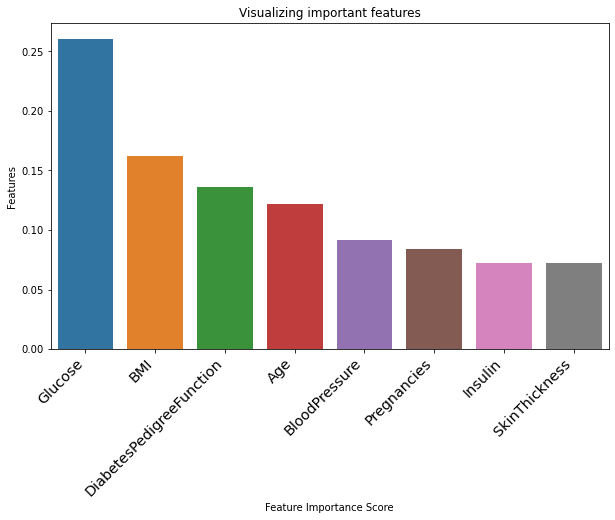

In [28]:
#visualize important feature
#creating a bar plot
plt.figure(figsize=(10,6))

sns.barplot(x=feature_imp_df.feature, y=feature_imp_df.importance)


plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing important features")

plt.xticks(rotation=45, horizontalalignment='right', fontsize="x-large", fontweight='light')
plt.show()

In [29]:
#load data with selected features

X = df.drop(['Outcome','SkinThickness','Insulin'], axis=1)
y = df['Outcome']

In [30]:
#scaling

scaler1 = StandardScaler()

In [31]:
X_scaled1 = scaler1.fit_transform(X)

In [32]:
#splitting

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42,stratify=y)

In [34]:
clf = RandomForestClassifier(n_estimators=150)

In [35]:
#train the model

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [36]:
#prediction

y_pred1 = clf.predict(X_test)

In [37]:
print('Accuracy:-', accuracy_score(y_pred1, y_test))

Accuracy:- 0.7597402597402597
